# Data Preparation 

In [37]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import cv2
from shapely.geometry import Polygon, box
import shutil
from func import * 
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
#USER = "Sophie"
#
#user = {"Sophie": ["C:/dev/Object-Detection-Air-Base-Military-Equipment/data/labelTxt", "C:/dev/Object-Detection-Air-Base-Military-Equipment/data/images"],
#        "Markus": ["/Users/markus/NoCloudDoks/Offline_Repos/Object-Detection-Air-Base-Military-Equipment/data/labelTxt/", ""],}

In [39]:
#!pip install opencv-python

## Explorative Datenanalyse 

### Filtern der Label-Dateien und Bilder

Im Projekt wird eine Object Detection von Helikoptern und Flugzeugen auf Satelitten Bilder trainiert. Im zugrundelegenden "DOTA"-Data Set sind Bilder mit unterschiedlichen Objekten, wie verschiedene Fahrzeuge oder Tennisplätze, enthalten. Zum Trainieren der Object Detection für diesen Anwendungsfall werden nur Bilder mit Helikopter und Flugzeugen benötigt. Daher werden diese Bilder und die zugehörigen Label-Datein gefiltert. 

In [54]:
#Liste mit Dateinamen 
dir_path = user[USER][0]
img_path = user[USER][1]


In [41]:
def get_list_imag_label_files(label_path):
    ''' 
    input: the path to the label directory 
    return: *tuples*: list of labels and list of images with 'helicopter' and 'plane'
    description: reduce file by 'helicopter' and 'plane' only
    ''' 
    img_list = list()
    text_list = list()
    label_list = os.listdir(label_path)
    for filename in label_list:
        path =  label_path + "\\" + filename
        with open(path) as f:
            if 'plane' in f.read():
                png = str.split(filename, ".")[0] + ".png"
                txt = str.split(filename, ".")[0] + ".txt"
                text_list.append(txt)
                img_list.append(png)
            elif 'helicopter' in f.read():
                png = str.split(filename, ".")[0] + ".png"
                txt = str.split(filename, ".")[0] + ".txt"
                text_list.append(txt)
                img_list.append(png)
    return img_list, text_list

In [42]:
list_img, list_text = get_list_imag_label_files(dir_path)

In [43]:
print(f"Plausibilitätscheck: \nLänge Image-List: {len(list_img)} \nLänge Label-List: {len(list_text)}")

Plausibilitätscheck: 
Länge Image-List: 70 
Länge Label-List: 70


### Bilder und Labels

Nachfolgenden werden die ersten drei Helikotper- und Flugzeug-Bilder mit der `load_img`- Methode aus der Tensorflow-Bibliothek abgerufen und mit `matplotlib` dargestellt.  

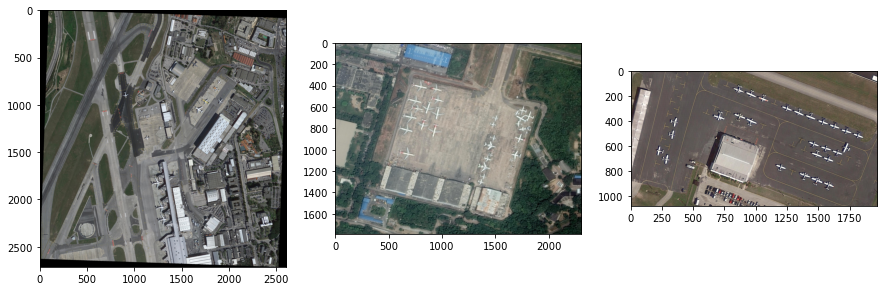

In [45]:
pic_1 = load_img(img_path + "/" + list_img[0])
pic_2 = load_img(img_path + "/" + list_img[1])
pic_3 = load_img(img_path + "/" + list_img[2])

fig, axes = plt.subplots(1,3,figsize=(15,7))
axes[0].imshow(pic_1)
axes[1].imshow(pic_2)
axes[2].imshow(pic_3)

```{glue:figure} boot_fig_fs1
:name: "fs_plain_data"

Darstellung der Rohdaten
```

Die Bilder haben unterschiedlichen Größen (Shapes), unterschiedliche Zoom-Stufen und sind teilweise rotiert. Im näcshten Schritt überprüfen wir ob die Label zu den Objekten passen. Dafür müssen zuerst die Koordinaten der Bounding-Box und die Labels aus den Datein extrahiert werden. 

In [ ]:
def get_list_boxes_labels(label_path, label_file):
    ''' 
    input: the path to the label directory and the label file name 
    return: list of bounding box and list of related label
    description: open label files, extract bounding box coordinates and translate label into 0,1
    '''
    boxes = list()
    labels = list()
    path = label_path + "/" + label_file
    with open(path) as f:
        for line in f:
            if 'plane' in line:
                box = str.split(line)[0:8]
                boxes.append(box)
                #for plane label = 0
                labels.append(0)
            elif 'helicopter' in line:
                box = str.split(line)[0:8]
                boxes.append(box)
                #for helicotper label = 1
                labels.append(1)
    return boxes, labels

In [ ]:
list_boxes_1, list_labels_1 = get_list_boxes_labels(dir_path,list_text[0])
list_boxes_2, list_labels_2 = get_list_boxes_labels(dir_path,list_text[1])
list_boxes_3, list_labels_3 = get_list_boxes_labels(dir_path,list_text[2])

Für die weitere Nutzung der Bounding Boxes muss ihr Format geändert werden. 

In [ ]:
# arrange the Boxes for
def reshap_bb(boxes_list):
    '''
    input: list of bounding boxes
    return: reshaped list of bounding boxes
    description: change the shape and data type of the bounding boxes 
    '''
    box_reshap = list () 
    for box in boxes_list:
        temp= np.asarray(box).reshape((4, 2))
        temp = temp.astype(np.int32)
        box_reshap.append(temp)
    return box_reshap

In [ ]:
list_boxes_1 = reshap_bb(list_boxes_1)
list_boxes_2 = reshap_bb(list_boxes_2)
list_boxes_3 = reshap_bb(list_boxes_3)

Für die Darstellung der BB Matplotlib müssen die Orginalbilder zu erst in ein numpy-Array umgewandelt werden. Die BB können nachfolgend mit der Methode `polylines` dargestellt werden. 

In [ ]:
numpy_image_1 = np.uint8(img_to_array(pic_1)).copy()
numpy_image_2 = np.uint8(img_to_array(pic_2)).copy()
numpy_image_3 = np.uint8(img_to_array(pic_3)).copy()

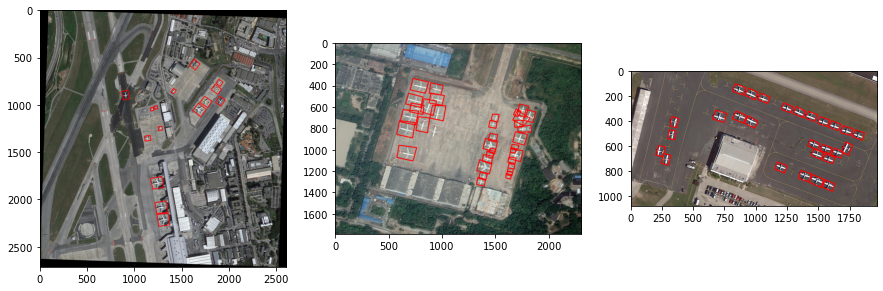

In [ ]:
for rectangle in list_boxes_1:
    cv2.polylines(numpy_image_1,[rectangle], True, (255, 0, 0), 7, 4)
for rectangle in list_boxes_2:
    cv2.polylines(numpy_image_2,[rectangle], True, (255, 0, 0), 7, 4)
for rectangle in list_boxes_3:
    cv2.polylines(numpy_image_3,[rectangle], True, (255, 0, 0), 7, 4)

fig, axes = plt.subplots(1,3,figsize=(15,7))
axes[0].imshow(numpy_image_1)
axes[1].imshow(numpy_image_2)
axes[2].imshow(numpy_image_3)

```{glue:figure} boot_fig_fs2
:name: "fs_plain_data2"

Darstellung der Rohdaten mit Bounding Boxen
```

Die Bounding Box sind keine regelmäßigen Rechtecke und rotiert. 

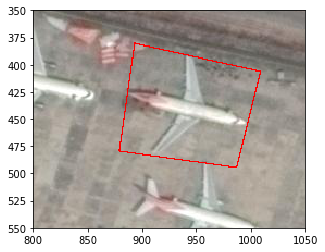

In [ ]:
numpy_image_2 = np.uint8(img_to_array(pic_2)).copy()
cv2.polylines(numpy_image_2,[list_boxes_2[16]], True, (255, 0, 0), 1, 4)
fig, ax = plt.subplots()
ax.set_ylim(550,350)
ax.set_xlim(800,1050)
plt.imshow(numpy_image_2,interpolation='none')

```{glue:figure} boot_fig_fs3
:name: "fs_plain_data3"

Rohdaten mit Bounding Boxen als unregelmäßiges Rechteck
```

Um das YOLO-Format für die gegeben Bounding Boxes zu erhalten, wird wie folgt vorgegangen: 
1. Bestimmung von zwei gegenüberliegenden Eckpunkten eines regelmäßigen Rechtecks
2. Bestimmung des Mittelpunkts
3. Ermitteln Breite und Höhe der Bounding Box  
4. Normierung der Bounding Boxes zur Bildgröße

Zur Näherung des regelmäßige Rechtecks werden zuerst die äußersten Punkte des Polygons angenommen. 

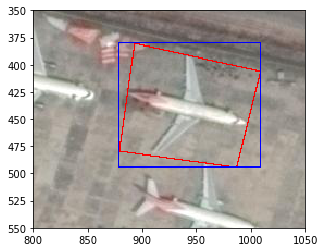

In [ ]:
# Verwenden der kleinsten und größten Punkte --> blaue Box
import cv2
cv2.rectangle(numpy_image_2, tuple(list_boxes_2[16].min(axis=0)), tuple(list_boxes_2[16].max(axis=0)), (0, 0, 255), 1)

fig, ax = plt.subplots()
ax.set_ylim(550,350)
ax.set_xlim(800,1050)
plt.imshow(numpy_image_2,interpolation='none')

```{glue:figure} boot_fig_fs4
:name: "fs_plain_data4"

Rohdaten mit Bounding Boxen Anpassung 1
```

Auf den Plot wird deutlich, dass das Rechteck sehr groß ist und unnötige Information mit ins Training einfließen würden. 

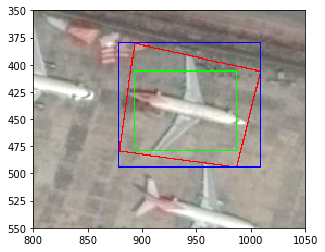

In [ ]:
# Verwenden der zweit-kleinsten und zweit-größten Punkte --> grüne Box
cv2.rectangle(numpy_image_2, tuple(np.sort(list_boxes_2[16], axis = 0)[1]),tuple(np.sort(list_boxes_2[16], axis = 0)[2]), (0, 255, 0), 1)

fig, ax = plt.subplots()
ax.plot(1628,1226,marker='.',color='red')
ax.set_ylim(550,350)
ax.set_xlim(800,1050)
plt.imshow(numpy_image_2,interpolation='none')

```{glue:figure} boot_fig_fs5
:name: "fs_plain_data5"

Rohdaten mit Bounding Boxen Anpassung 2
```

Das grün dargestellt Rechteck aus den kleinsten Punkten schneidet Teile des Flugzeugs ab und ist deswegen ebenfalls ungeeignet. 

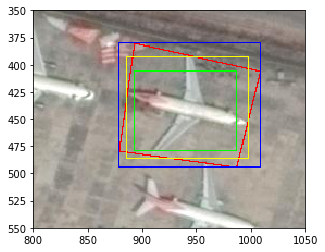

In [ ]:
# Verwenden der Mittelwerte aus zwei kleinsten und zwei größten Punkte --> gelbe Box
x_max = np.rint(np.mean(np.sort(np.max(list_boxes_2[16],axis=1))[-2:])).astype(int)
x_min = np.rint(np.mean(np.sort(np.max(list_boxes_2[16],axis=1))[:2])).astype(int)
y_max = np.rint(np.mean(np.sort(np.min(list_boxes_2[16],axis=1))[-2:])).astype(int)
y_min = np.rint(np.mean(np.sort(np.min(list_boxes_2[16],axis=1))[:2])).astype(int)

cv2.rectangle(numpy_image_2,(x_max,y_max) ,(x_min,y_min), (255, 255, 0), 1)

fig, ax = plt.subplots()
ax.plot(1628,1226,marker='.',color='red')
ax.set_ylim(550,350)
ax.set_xlim(800,1050)
plt.imshow(numpy_image_2,interpolation='none')

```{glue:figure} boot_fig_fs6
:name: "fs_plain_data6"

Rohdaten mit Bounding Boxen Anpassung 3
```

Zur Nährung der Bounding Boxen wird aus diesem Mittelwerte des grünen und blauen Rechtecks gewählt. 

Zur Bestimmung des Mittelpunkts wird die Centroid-Funktion aus der Polygon-Bibliothek genutzt. 

In [ ]:
centroid_coor = Polygon(list_boxes_2[16]).centroid.coords[0]
centroid_coor

(941.211419610737, 438.90179257756046)

In [ ]:
from func import *
example_bb = get_regular_yolov(list_boxes_2[16], numpy_image_2, True)
example_bb

{'centroid': (941, 439), 'coord_one': (998, 486), 'coord_two': (886, 393)}

Diese ist bereits in der Funktion `get_regular_yolov` angewandt.  

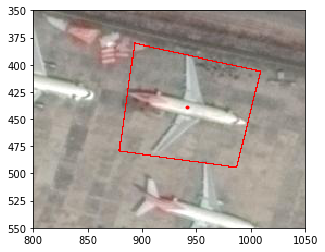

In [ ]:
numpy_image_2 = np.uint8(img_to_array(pic_2)).copy() #Rücksetzen des Bidles
cv2.polylines(numpy_image_2, [list_boxes_2[16]], True, (255, 0, 0), 1, 4)

fig, ax = plt.subplots()
ax.set_ylim(550,350)
ax.set_xlim(800,1050)
ax.plot(example_bb['centroid'][0],example_bb['centroid'][1],marker='.',color='red')
plt.imshow(numpy_image_2,interpolation='none')

```{glue:figure} boot_fig_fs7
:name: "fs_plain_data7"

Rohdaten mit Bounding Box Mittelpunkt
```

Aus den berechneten Eckpunkten wird die Höhe und Länges des regelmäßigen Rechtecks bestimmt. Diese Information und der Mittelpunkt werden anschließend relativ zur Bildgröße normiert. 
Die erhalten Werte (normierte Höhe, Länge und Mittelpunkt) entsprechen dem YOLO-Format. 
Diese Schritte sind ebenfalls in der Funktion `get_regular_yolov` enthalten. Die folgende Funktion ist Teil der func.py. 

In [ ]:
def get_regular_yolov(myArray,np_img,rect_plot=False):
    '''
    takes numpy array of shape (4,2) from the label-files and the image as array
    returns yolov5 format with normalized centriod, width and height

    if rect_plot is False a yolo format is returned
    if rect_plot is True a dictionary with coordinates for ploting is returned

    first calculation of mean of two lowest and two heighest values for x and y axis
    second calculation of centroid coordinates with shapely function Polygon
    third extraction of picture shape from image (as array)
    fourth normalization according to yolo requirements for labeling
    '''

    x_max = np.mean(np.sort(myArray[:,0])[-2:])
    x_min = np.mean(np.sort(myArray[:,0])[:2])
    y_max = np.mean(np.sort(myArray[:,1])[-2:])
    y_min = np.mean(np.sort(myArray[:,1])[:2])
    centroid = Polygon(myArray).centroid.coords[0]

    w_img = np_img.shape[1]
    h_img = np_img.shape[0]

    norm_centroid_x = centroid[0] / w_img
    norm_centroid_y = centroid[1] / h_img
    norm_width = abs(x_max-x_min) / w_img
    norm_height = abs(y_max-y_min) / h_img

    if rect_plot:
        return {
            'centroid':(np.rint(centroid[0]).astype(int),np.rint(centroid[1]).astype(int)),
            'coord_one':(np.rint(x_max).astype(int),np.rint(y_max).astype(int)),
            'coord_two':(np.rint(x_min).astype(int),np.rint(y_min).astype(int))
            }
    else:
        return (norm_centroid_x,norm_centroid_y,norm_width,norm_height)

In [ ]:
get_regular_yolov(list_boxes_2[16],numpy_image_2,True)

{'centroid': (874, 605), 'coord_one': (931, 668), 'coord_two': (814, 540)}

In [ ]:
get_regular_yolov(list_boxes_2[16],numpy_image_2,False)

### Automation Bildanpassung YOLO-Formt

Die oben gezeigten Schritte müssen alle für Trainings- und Validierungsdaten ausgeführt werden. Dazu werden die oben beschriebenen Funktionen in einer For-Schleife angewendet. 
Vorraussetzung für die Automation ist nur die Ausführung des Notebook-Kopfs (Importe und Konfigurationen). 

In [64]:
list_images_files, list_text_files= get_list_imag_label_files(dir_path)

In [ ]:
for count, label_file in enumerate(list_text):
    
    #Get Image
    temp_img = load_img(img_path + "/" + list_images_files[count])
    temp_image = np.uint8(img_to_array(temp_img)).copy()

    #Get Boxes and labels
    temp_box_list_single_file, temp_label_list_single_file = get_list_boxes_labels(dir_path,label_file)
    
    #Reshap Boxes
    temp_box_list_single_file = reshap_bb(temp_box_list_single_file)
    
    #Create Yolo Label File
    lines_text_file= list()
    for cnt, single_box in enumerate(temp_box_list_single_file):
       yolo_boxes = get_regular_yolov(single_box,temp_image,False)
       lines_text_file.append(f"{temp_label_list_single_file[cnt]} {round(yolo_boxes[0],6)} {round(yolo_boxes[1],6)} {round(yolo_boxes[2],6)} {round(yolo_boxes[3],6)}")

    #Write Labelfile
    with open(f"data_new\labels\{txt_file_name}", 'w') as f:
        for line in lines_text_file:
            f.write(line)
            f.write("\n")
    
    #Copie Imagefile
    img_file_name = list_images[count]
    src_path = "C:\\dev\\Object-Detection-Air-Base-Military-Equipment\\data\\images\\" + img_file_name
    dst_path = "C:\\dev\\Object-Detection-Air-Base-Military-Equipment\\data_new\\images\\" + img_file_name
    shutil.copy(src_path, dst_path)


## Näherungsnachweis über Fläche

In [ ]:
# Red rectangle / polygon
Polygon(temp).area

1857.5

In [ ]:
# Yellow rectangle
rect.area

1764.0

In [ ]:
# Green rectangle
box(1607,1214,1650,1239).area

1075.0

In [ ]:
# Blue rectangle
box(1602,1202,1657,1250).area

2640.0